## Esercizio A

Data la matrice
$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu  e sfruttarla per il calcolo del suo determinante e della sua inversa.

## Esercizio  B

Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con 
$$
\begin{array}{c}
x_1=0, \quad x_2=4, \quad x_3=0, \quad x_4=5\\
y_1=0, \quad y_2=0, \quad y_3=4, \quad y_4=6.
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 2**]

- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$;   [**punti 5**]

-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 3**]


**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$

Norma 2 al quadrato dell'errore  36.69841269841269


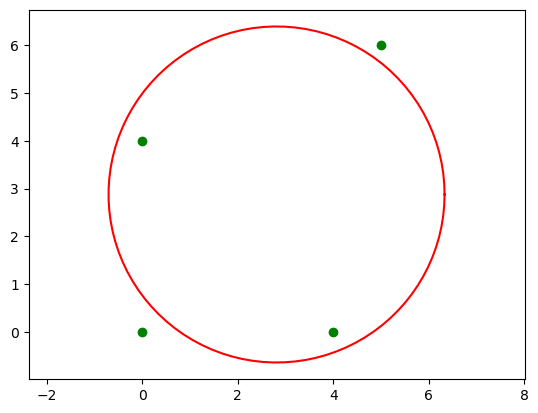

In [1]:
import numpy as np
import scipy.linalg as spl
from SolveTriangular import *
import matplotlib.pyplot as plt
import math
px=np.array([0,4,0,5])
py=np.array([0,0,4,6])
A=np.array([[0,0,1],[4,0,1],[0,4,1],[5,6,1]])
b=np.array([[0],[-16],[-16],[-61]])
n=2
Q,R=spl.qr(A)
y1=np.dot(Q.T,b)
a,flag=Usolve(R[0:n+1,:],y1[0:n+1])

err=spl.norm(np.dot(A,a)-b,2)**2
print("Norma 2 al quadrato dell'errore ",err)
a=a.flatten()
cx=-a[0]/2
cy=-a[1]/2

r1=math.sqrt((a[0]**2)/4+(a[1]**2)/4-a[2])
t=np.linspace(0,2*math.pi,100)
x=cx+r1*np.cos(t)
y=cy+r1*np.sin(t)
plt.plot(x,y,'r-') 
plt.plot(px,py,'go')
plt.axis('equal')
plt.show()


## Esercizio 3
Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

In [2]:
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    Q,R=spl.qr(A)
    h=Q.T@b
    x,flag=Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

In [3]:
def eqnorm(A,b):
 
    G=A.T@A
     
    print("Indice di condizionamento di G ",np.linalg.cond(G))
    f=A.T@b
    L=spl.cholesky(G,lower=True)
   
    y,flag= Lsolve(L,f)
    if flag==0:
        x,flag=Usolve(L.T,y)
    
    
    return x

Rango di M----> 3
Con Condizionamento M -->  18.45808953019454
Rango di A1 ---> 2
Condizionamento di A1--->  4.663457775986457
Indice di condizionamento di G  21.747838428408542
Rango di A2 3
Condizionamento di A2  65.6749352562479
quadrato residuo exp 1.224973312890182e-05
quadrato residuo pol grado 2  0.0002364635594024983


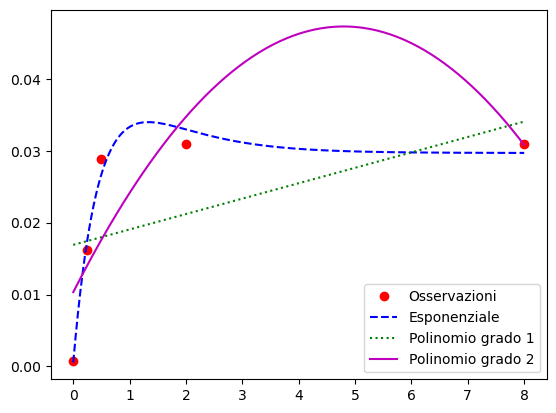

In [10]:
m=5
x4 = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 
y4 = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310]) 
M=np.zeros((5,3))
M[:,0]=np.ones((5,))
M[:,1]=np.exp(-x4)
M[:,2]=np.exp(-2*x4)

print('Rango di M---->' , np.linalg.matrix_rank(M))
print("Con Condizionamento M --> ",np.linalg.cond(M))
#La matrice M è a rango massimo, ha condizionamento 18.45, quindi la marice G delle equazioni
#normali (di dimensioni 4x4) avrebbe indice
#di condizionamento circa 343. Utilizzo il metodo 
aexp,resexp=qrLS(M,y4)

xx=np.linspace(np.min(x4),np.max(x4),200)
polexp=aexp[0]+aexp[1]*np.exp(-xx)+aexp[2]*np.exp(-2*xx)

# Calcolo del polinomio approssimante di grado 1
n=1
n1=n+1
A1=np.vander(x4,increasing=True)[:,:n1]
print('Rango di A1 --->',np.linalg.matrix_rank(A1))
print("Condizionamento di A1---> ",np.linalg.cond(A1))
#Matrice a rango massimo e ben condizionata: uso le equazioni normali
alpha1=eqnorm(A1,y4)
pol1=np.polyval(np.flip(alpha1),xx)

#Parabola approssimante
n=2
n1=n+1
A2=np.vander(x4,increasing=True)[:,:n1]
print('Rango di A2',np.linalg.matrix_rank(A2))
print("Condizionamento di A2 ",np.linalg.cond(A2))
#Matrice a rango massimo e mediamente mal condizionata: uso qr
alpha2,res2=qrLS(A2,y4)
pol2=np.polyval(np.flip(alpha2),xx)
print("quadrato residuo exp",resexp)
print("quadrato residuo pol grado 2 ",res2)

plt.plot(x4,y4,'ro',xx,polexp,'b--',xx,pol1,'g:',xx,pol2,'m-')
plt.legend(['Osservazioni','Esponenziale','Polinomio grado 1','Polinomio grado 2'])

# Esercizio 4

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella 

L	[-55	-45	-35	-25	-15	-5	5	15	25	35	45	55	65]

T	[3.7	3.7	3.52	3.27	3.2	3.15	3.15	3.25	3.47	3.52	3.65	3.67	3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.

In [5]:
def my_newtonSys(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema F(x)=0
  mediante il metodo di Newton.

  Parametri
  ----------
  fun : funzione vettoriale contenente ciascuna equazione non lineare del sistema.
  jac : funzione che calcola la matrice Jacobiana della funzione vettoriale.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
    Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None, None,None

  s = -np.linalg.solve(matjac, fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]

  while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
    x0 = x1
    it += 1
    matjac = jac(x0)
    if np.linalg.det(matjac) == 0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None

    # Risolvo il sistema lineare avente come matrice dei coefficienti la
    # matrice Jacobiana e come termine noto la Funzione vettoriale F valutata
    # in x0
    s = -np.linalg.solve(matjac, fun(x0))

    # Aggiornamento della soluzione
    x1 = x0 + s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm


def my_newtonSys_corde(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton, con variante delle corde, in cui lo Jacobiano non viene calcolato
  ad ogni iterazione, ma rimane fisso, calcolato nell'iterato iniziale x0.
  
 Parametri
  ----------
  fun : funzione vettoriale contenente ciascuna equazione non lineare del sistema.
  jac : funzione che calcola la matrice Jacobiana della funzione vettoriale.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore tra due soluzioni successive.
  tolf : float
    Parametro di tolleranza sul valore della funzione.
  nmax : int
    Numero massimo di iterazioni.
    
  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
      Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)  #Utilizzo per tutte le iterazioni la matrice Jacobiana valutata nell'ierato iniziale, senza mai aggiornarla
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None, None,None
  s = -np.linalg.solve(matjac, fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]

  while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
    x0 = x1
    it += 1
   
   
    if np.linalg.det(matjac) == 0:
        print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
        return None, None,None
    
    # Risolvo il sistema lineare avente come matrice dei coefficienti la
    # matrice Jacobiana e come termine noto la Funzione vettoriale F valutata
    # in x0
    
    s = -np.linalg.solve(matjac, fun(x0))

    # Aggiornamento della soluzione
    x1 = x0 + s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm

def my_newtonSys_sham(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton, con variante delle shamanski, in cui lo Jacobiano viene
  aggiornato ogni un tot di iterazioni, deciso dall'utente.

  Parametri
  ----------
  fun : funzione vettoriale contenente ciascuna equazione non lineare del sistema.
  jac : funzione che calcola la matrice Jacobiana della funzione vettoriale.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore tra due soluzioni successive.
  tolf : float
    Parametro di tolleranza sul valore della funzione.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
      Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None,None,None

  s = -np.linalg.solve(matjac, fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]
  update=10  #Numero di iterazioni durante le quali non si aggiorna la valutazione dello Jacobiano nell'iterato attuale
  while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
    x0 = x1
    it += 1
    if it%update==0:   #Valuto la matrice di iterazione nel nuovo iterato ogni "update" iterazioni
        matjac=jac(x0)
   
        if np.linalg.det(matjac) == 0:
           print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
           return None,None,None
        else:
         # Risolvo il sistema lineare avente come matrice dei coefficienti la
        # matrice Jacobiana valutatata nell'iterato aggiornato x0  e come termine noto la Funzione vettoriale F valutata
        # in x0
           s = -np.linalg.solve(matjac, fun(x0))
    else:
         # Risolvo il sistema lineare avente come matrice dei coefficienti la
        # matrice Jacobiana non aggiornata e come termine noto la Funzione vettoriale F valutata
        # in x0
           s = -np.linalg.solve(matjac, fun(x0))

    # Aggiornamento della soluzione
    x1 = x0 + s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm


## Esercizio 6

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare

Risolvere il sistema di equazioni non lineare 

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
 x_1+3x_0x_1^2=57
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]

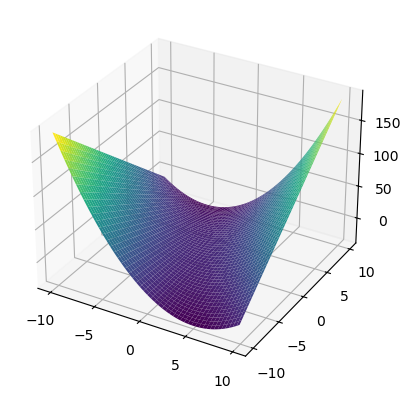

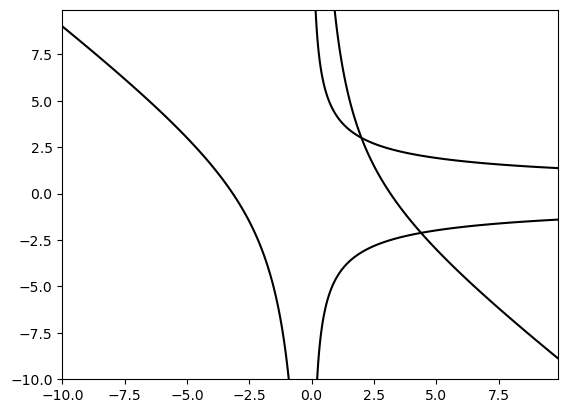

In [6]:
from mpl_toolkits.mplot3d import Axes3D
# Per disegnare una superficie
x = np.arange(-10.0, 10.0,0.1)
y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)
Z=X**2+X*Y-10

Z1=Y+3*X*Y**2-57
# Plotta la superficie direttamente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
 
plt.show()

#Per disegnare le curve di livello corrispondente a z=0
plt.contour(X, Y, Z, levels=[0], colors='black')
plt.contour(X, Y, Z1, levels=[0], colors='black')


F= lambda x : np.array([
            x[0]**2 + x[0]*x[1]-10,
            x[1]+3*x[0]*x[1]**2-57,
        ])


#Jac= lambda x: np.array([[2*x[0]+x[1],x[0]],[3*x[1]**2,1+6*x[0]])
Jac= lambda x: np.array([[2*x[0]+x[1], x[0]],[3*x[1]**2,1+6*x[0]*x[1]]])
      

In [7]:
x0=np.array([1.0,6.5])
nmax=500
xN,contN,XmN= my_newtonSys(F,Jac,x0,1e-8,1e-8,nmax)
print("Soluzione con Newton-Raphson ", xN, "in ",contN," iterazioni")
xNC,contNC,XmNC= my_newtonSys_corde(F,Jac,x0,1e-8,1e-8,nmax)
print("Soluzione con Newton-Raphson Corde ", xN, "in ",contNC," iterazioni") 
xNsham,contNsham,XmNsham= my_newtonSys_sham(F,Jac,x0,1e-8,1e-8,nmax)
print("Soluzione con Newton-Raphson Shamanskii ", xN, "in ",contNsham," iterazioni") 

Soluzione con Newton-Raphson  [2. 3.] in  5  iterazioni
Soluzione con Newton-Raphson Corde  [2. 3.] in  50  iterazioni
Soluzione con Newton-Raphson Shamanskii  [2. 3.] in  14  iterazioni


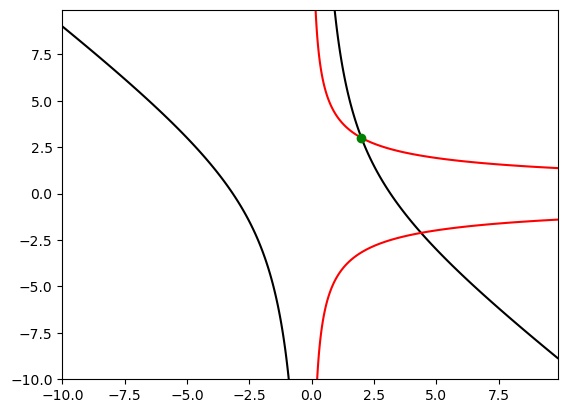

In [8]:
plt.contour(X, Y, Z, levels=[0], colors='black')
plt.contour(X, Y, Z1, levels=[0], colors='red')
plt.plot(xN[0],xN[1],'go')
plt.show()

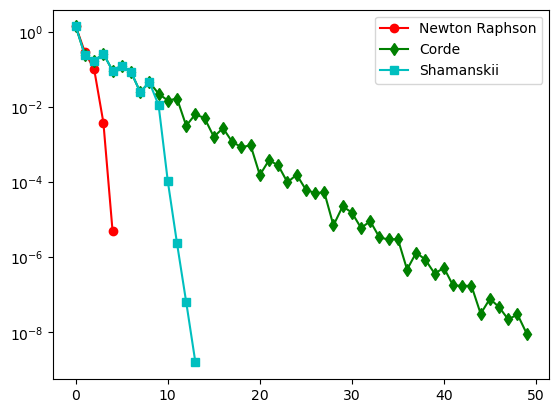

In [9]:
plt.semilogy(range(contN),XmN,'r-o',range(contNC),XmNC,'g-d',range(contNsham),XmNsham,'c-s')
plt.legend(['Newton Raphson','Corde','Shamanskii'])